# Reading XRF data

In [67]:
from XRDXRFutils import DataXRF,resample

from numpy import arange,linspace
from matplotlib.pyplot import plot,subplots,xlim,ylim,hlines,vlines,xlabel,ylabel,imshow,legend

from scipy.interpolate import interp1d
from numpy import concatenate,append,array,diff,trapz

from multiprocessing import Pool

In [68]:
from scipy.stats import poisson

In [70]:
data = DataXRF()

In [71]:
path = '/home/zdenek/storage/dataXRDXRF/Giulia_XRF/'
data.calibrate_from_file('/home/zdenek/storage/dataXRDXRF/Giulia_XRF/calibration.ini')

In [16]:
data.calibration.fce,data.calibration.opt

(<function XRDXRFutils.data.DataXRF.fce_calibration(x, a, b, c)>,
 array([5.39879509e-08, 1.45313607e-02, 3.92271718e-02]))

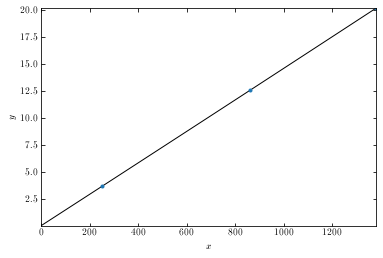

In [17]:
data.calibration.plot()

In [18]:
%%time
data.read(path + 'edfs/')

Reading XRF data
Done
CPU times: user 1.91 s, sys: 3.06 s, total: 4.97 s
Wall time: 4.97 s


In [20]:
data.save_h5(path + 'xrf.h5')

Saving: /home/zdenek/storage/dataXRDXRF/ElGreco_XRF/xrf.h5


In [23]:
%%time
data.load_h5(path + 'xrf.h5')
print(data.data.shape)

Loading: /home/zdenek/storage/dataXRDXRF/ElGreco_XRF/xrf.h5
(407, 724, 2048)
CPU times: user 3.7 ms, sys: 1.9 s, total: 1.9 s
Wall time: 1.89 s


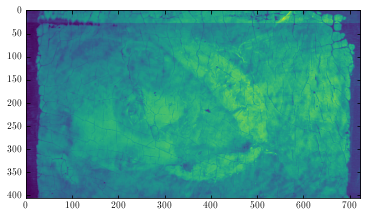

In [24]:
imshow(data.data.sum(-1)[::-1])

Text(0, 0.5, 'counts')

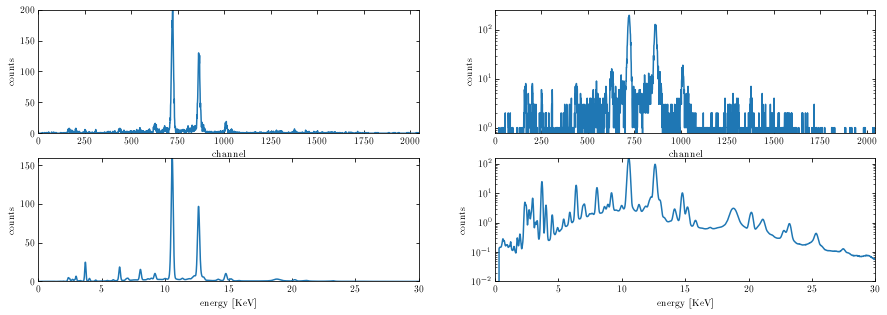

In [25]:
fig,ax = subplots(2,2,figsize=(15,5))

y = data.data[100,101]

ax[0,0].plot(y)
ax[0,0].set_xlim(0,2048)
ax[0,0].set_ylim(0,y.max())
ax[0,0].set_xlabel('channel')
ax[0,0].set_ylabel('counts')

ax[0,1].semilogy(y)
ax[0,1].set_xlim(0,2048)
ax[0,1].set_xlabel('channel')
ax[0,1].set_ylabel('counts')

y = data.data.mean(0).mean(0)
x = data.x

ax[1,0].plot(x,y)
ax[1,0].set_xlim(0,x.max())
ax[1,0].set_ylim(0,y.max())
ax[1,0].set_xlabel('energy [KeV]')
ax[1,0].set_ylabel('counts')

ax[1,1].semilogy(x,y)
ax[1,1].set_xlim(0,x.max())
ax[1,1].set_ylim(1e-2,y.max())
ax[1,1].set_xlabel('energy [KeV]')
ax[1,1].set_ylabel('counts')

In [26]:
%%time
c = data.resample()
len(c)

CPU times: user 688 ms, sys: 17.1 ms, total: 705 ms
Wall time: 703 ms


294668

In [27]:
%%time
def f(x):
    return x.resample_y()

with Pool() as p:
    out = p.map(f,c,1024)

CPU times: user 38.7 s, sys: 18.4 s, total: 57.1 s
Wall time: 10min 31s


In [52]:
new_data = array(out).reshape(data.shape[0],data.shape[1],-1)
new_data.shape

(407, 724, 1024)

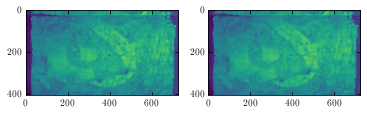

In [53]:
fig,ax = subplots(1,2)

ax[0].imshow(data.data.sum(-1)[::-1])
ax[1].imshow(new_data.sum(-1)[::-1])

14.60957405453221
14.609574054532198
14.609574054532205
14.609574054532231
14.609574054532212
14.60957405453222
CPU times: user 769 ms, sys: 2.12 ms, total: 771 ms
Wall time: 768 ms


Text(0, 0.5, 'counts')

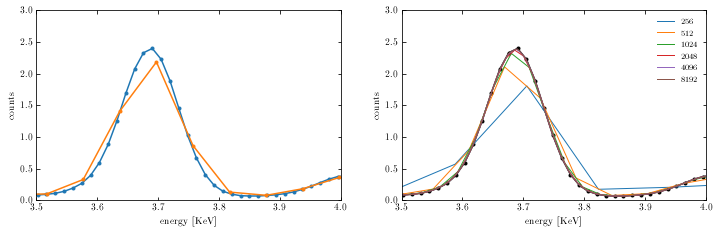

In [20]:
%%time
x = data.x
y = data.data.mean(0).mean(0)

ix,iy = resample(x,y,nbins=500)

fig,ax = subplots(1,2,figsize=(12,3.5))

ax[0].plot(x,y,'.-')
b = ix[1] - ix[0]
ax[0].plot(ix,iy / b,'.-')

ax[0].set_xlim(3.5,4)
ax[0].set_ylim(0,3)
ax[0].set_xlabel('energy [KeV]')
ax[0].set_ylabel('counts')

ax[1].plot(x,y,'k.-')

for n in [256,512,1024,2048,4096,8192]:
    ix,iy = resample(x,y,n)
    b = ix[1] - ix[0]
    print(sum(iy))
    
    ax[1].plot(ix,iy / b,'-',lw=1,label='%s'%n)

#xlim(5.6,6.2)
ax[1].legend(frameon=False)
ax[1].set_xlim(3.5,4)
ax[1].set_ylim(0,3)
ax[1].set_xlabel('energy [KeV]')
ax[1].set_ylabel('counts')